In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

In [ ]:
df = pd.read_csv("LL-Output-Mon-27-Oct-2025-at-11-07-32AM.txt", header=None, names= ["MC step","Ratio","Energy","Order"],skiprows=9, delimiter=r"\s+")

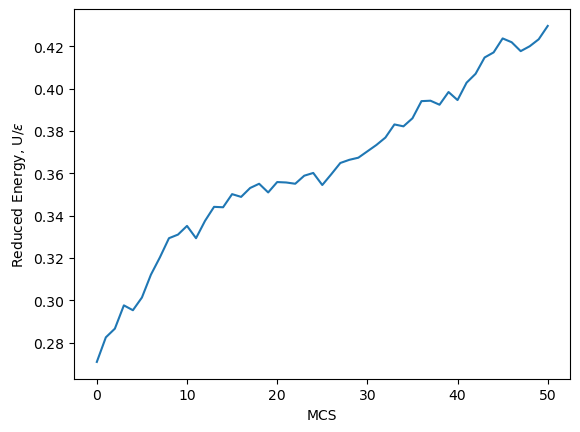

In [11]:
plt.plot(df['MC step'], df['Order'])
plt.xlabel("MCS")
plt.ylabel(r"Reduced Energy, U/$\epsilon$")
plt.show()

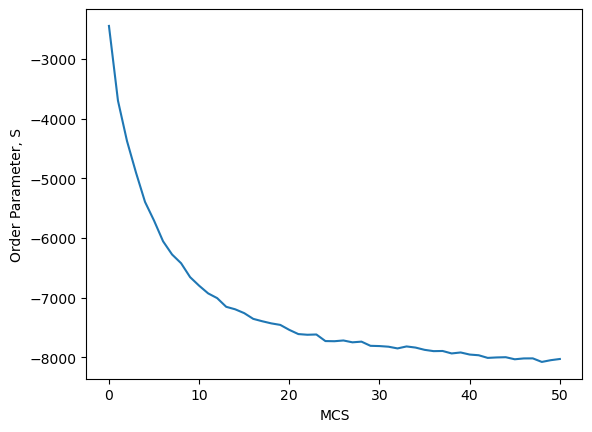

In [6]:
plt.plot(df['MC step'], df['Energy'])
plt.xlabel("MCS")
plt.ylabel("Order Parameter, S")
plt.show()

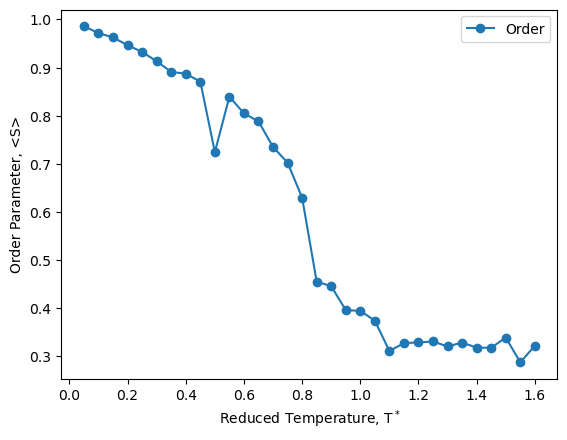

In [36]:
order_df = pd.read_csv("avg_order.csv", header=0, delimiter=",")
fig, ax = plt.subplots()
order_df.groupby(['Temp']).mean().plot(marker="o", ax=ax)
plt.xlabel(r"Reduced Temperature, T$^*$")
plt.ylabel("Order Parameter, <S>")
plt.show()

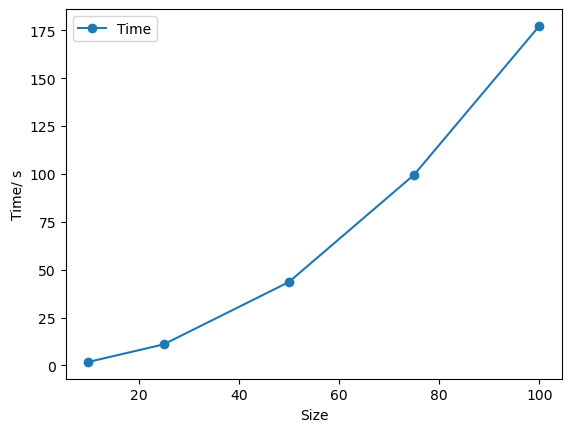

In [39]:
time_df = pd.read_csv("timings.csv", header=0, delimiter=",")
fig, ax = plt.subplots()
time_df.groupby(['Size']).mean().plot(marker="o", ax=ax)
plt.xlabel("Size")
plt.ylabel("Time/ s")
plt.show()